# Bank Loan Term Prediction
---

## Import packages & read data.

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

# Modeling imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score,log_loss, confusion_matrix, precision_score, recall_score, accuracy_score 
from sklearn import linear_model, ensemble , tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.linear_model import LogisticRegression
import imblearn.over_sampling
from sklearn.svm import SVC  
from sklearn.utils import class_weight
import statsmodels.api as sm
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline, make_pipeline 
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics

In [2]:
df = pd.read_csv('credit_train.csv')
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(100514, 19)

In [4]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [7]:
duplicate = df.duplicated()
print(f'Duplicate in df :', duplicate.sum())

Duplicate in df : 10728


**Rename columns for easer code writing**

In [8]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [9]:
df.columns = df.columns.str.replace(' ','_')

In [10]:
df.columns

Index(['Loan_ID', 'Customer_ID', 'Loan_Status', 'Current_Loan_Amount', 'Term',
       'Credit_Score', 'Annual_Income', 'Years_in_current_job',
       'Home_Ownership', 'Purpose', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

## Split the data for train, validation and test

In [11]:
# X = df.drop(columns='Term')
# y = pd.DataFrame(df['Term'])

# cross val
df_train, df_test  = train_test_split(df, test_size=0.2, random_state=42)

# # split the data for train and test
# df_Train, df_test = train_test_split(df, test_size = 0.2, random_state = 30 )

# # split the train for train and val
# df_train, df_val = train_test_split(df_Train, test_size = 0.2, random_state = 30 )

In [12]:
print(f'Shape of train:', df_train.shape)
# print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (80411, 19)
Shape of test: (20103, 19)


## Data Pre-processing

### Cleaning data

In [13]:
# reset index for train
df_train = df_train.reset_index(drop=True)

# # reset index for val
# df_val = df_val.reset_index(drop=True)

# reset index for val
df_test = df_test.reset_index(drop=True)

In [14]:
# dope nulls in Loan_ID

# for train
df_train = df_train.dropna(subset = ['Loan_ID'])

# # for val
# df_val = df_val.dropna(subset = ['Loan_ID'])

# for test
df_test = df_test.dropna(subset = ['Loan_ID'])

In [15]:
print(f'Shape of train:', df_train.shape)
# print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (79992, 19)
Shape of test: (20008, 19)


In [16]:
df_train.sample(20)

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
27654,fa40af17-5040-4c1f-a2a5-403db12e45d4,13a83f44-1eb6-4f13-adf3-1afa79bb64d3,Fully Paid,269434.0,Short Term,746.0,1163484.0,5 years,Rent,Debt Consolidation,18809.62,39.9,NaN,11.0,0.0,264860.0,1394030.0,0.0,0.0
11179,193902b3-0381-4bab-9907-1ab70f9c75e5,ccafd700-e3a3-46e7-ac6f-d52bbf43bed6,Fully Paid,324742.0,Short Term,704.0,623238.0,1 year,Rent,Debt Consolidation,15165.42,9.0,NaN,11.0,0.0,207841.0,299706.0,0.0,0.0
38955,e54243a5-5c9a-442c-a8e6-e2a26687d9f9,d862d3e1-39c5-4c27-ae0b-013d440d8bf2,Fully Paid,232694.0,Short Term,724.0,836589.0,< 1 year,Rent,Debt Consolidation,15407.10,12.9,NaN,10.0,0.0,238165.0,494230.0,0.0,0.0
73060,4081d280-a9a2-431e-8813-66deee62415d,a5b814f3-0c6a-408b-9ab4-1f0dee1bc957,Fully Paid,107756.0,Short Term,715.0,1488840.0,10+ years,Home Mortgage,Debt Consolidation,24317.72,15.0,3.0,14.0,0.0,57266.0,300036.0,0.0,0.0
23164,ec052f62-239f-4764-b227-1ccaa73fc7fb,6a9bdcb3-cc39-4cdc-8971-acfe1f783af0,Fully Paid,601282.0,Long Term,645.0,1669131.0,8 years,Own Home,Debt Consolidation,25315.22,23.2,33.0,10.0,0.0,117477.0,279290.0,0.0,0.0
67615,017f7926-3b47-411c-9a9c-d2400e54aaec,017f0023-675f-4cf9-ae16-de626a09b04c,Fully Paid,99999999.0,Short Term,724.0,4690150.0,10+ years,Home Mortgage,other,52373.31,21.0,NaN,15.0,0.0,1742680.0,2963026.0,0.0,0.0
26493,55952c64-de45-4ce1-b9e9-1a0734771860,90c0d414-ebe8-4cc1-a247-2cab25926734,Fully Paid,220110.0,Long Term,743.0,1695921.0,10+ years,Rent,other,2430.86,18.7,27.0,7.0,0.0,67108.0,747230.0,0.0,0.0
47887,34863e05-27b6-49e2-b1ba-092d47ef0d05,6a7ad2b6-eb04-4bcb-99dd-a3fc05a310c5,Charged Off,443784.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Home Improvements,23580.52,17.2,47.0,9.0,0.0,136933.0,190806.0,0.0,0.0
69022,cad42f7d-cbe6-4cf1-99b7-079763ba02b2,6330f0bb-dcec-4673-9f49-848e08fbf193,Fully Paid,334268.0,Long Term,722.0,1635843.0,9 years,Rent,Debt Consolidation,20720.64,15.0,NaN,19.0,0.0,255189.0,499136.0,0.0,0.0
70238,9a571e1b-c127-462b-b99a-f99f077b6969,234c32df-bf4f-49e5-b8c6-54743a7644fe,Fully Paid,223740.0,Short Term,711.0,1642455.0,10+ years,Rent,other,21625.80,16.6,NaN,13.0,0.0,310555.0,474386.0,0.0,0.0


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79992 entries, 0 to 80410
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       79992 non-null  object 
 1   Customer_ID                   79992 non-null  object 
 2   Loan_Status                   79992 non-null  object 
 3   Current_Loan_Amount           79992 non-null  float64
 4   Term                          79992 non-null  object 
 5   Credit_Score                  64536 non-null  float64
 6   Annual_Income                 64536 non-null  float64
 7   Years_in_current_job          76606 non-null  object 
 8   Home_Ownership                79992 non-null  object 
 9   Purpose                       79992 non-null  object 
 10  Monthly_Debt                  79992 non-null  float64
 11  Years_of_Credit_History       79992 non-null  float64
 12  Months_since_last_delinquent  37455 non-null  float64
 13  N

In [18]:
df_train.isna().sum()

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    15456
Annual_Income                   15456
Years_in_current_job             3386
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    42537
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 2
Bankruptcies                      150
Tax_Liens                           5
dtype: int64

In [19]:
# check for dublicate

# for train
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

# # for val
# duplicate = df_val.duplicated()
# print(f'Duplicate in validation :', duplicate.sum())

# for test
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())
print(f'Shape of train:', df_train.shape)
# print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Duplicate in train : 6520
Duplicate in test : 401
Shape of train: (79992, 19)
Shape of test: (20008, 19)


In [20]:
# drop duplicates rows
# train
df_train.drop_duplicates(inplace=True)

# val
# df_val.drop_duplicates(inplace=True)

# test
df_test.drop_duplicates(inplace=True)

In [21]:
# check for dublicate

# for train
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

# # for val
# duplicate = df_val.duplicated()
# print(f'Duplicate in validation :', duplicate.sum())

# for test
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())
print(f'Shape of train:', df_train.shape)
# print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Duplicate in train : 0
Duplicate in test : 0
Shape of train: (73472, 19)
Shape of test: (19607, 19)


**Duplicate in Loan ID**

In [22]:
df_train['Loan_ID'].value_counts().sort_values(ascending=False)

6db53821-e72f-4841-9b83-ad8ee0eb80b2    2
86e1b780-0893-4b3a-9ca9-38e1688b1032    2
10580f0d-fa0a-4014-a8d3-4a6f34795794    2
14e2955d-4309-42c6-a5f5-5ac02ff1a85a    2
aedf9b9b-c1d0-4b6b-87f5-24aed95597d2    2
                                       ..
8c3110cd-8ff3-4893-a6ba-b79da2e8580b    1
ceb2cdcb-f3a0-4a8c-af49-7a955c8ae4d2    1
cfb7b08b-7975-4857-814c-d632f77a4b08    1
33d63b86-933c-4a7b-8cf7-8803ce0fa082    1
fe3cd38c-ad72-48ce-a0c6-148517f3c009    1
Name: Loan_ID, Length: 68478, dtype: int64

In [23]:
df_train[df_train.Loan_ID.duplicated()]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
616,ccb4bff4-4103-4220-bd6a-7cf8d97660f2,f7ad2ea9-c1a2-4020-8db9-d1ce98dd9cac,Fully Paid,215512.0,Short Term,716.0,1302868.0,7 years,Rent,Debt Consolidation,5830.34,13.8,NaN,6.0,0.0,84284.0,325270.0,0.0,0.0
625,cb1970cb-57d1-4d98-9889-c95b36e4c72a,9a4fded3-a8a1-42e2-b10e-31ce3925e444,Fully Paid,357808.0,Long Term,671.0,1158810.0,2 years,Home Mortgage,Debt Consolidation,29260.00,12.5,1.0,27.0,0.0,331759.0,1401994.0,0.0,0.0
981,6c36c90c-da96-42cf-b46d-81f50ec470f3,8a4d6d5b-69e0-4bde-afb2-cc1d3e8b831f,Fully Paid,456786.0,Long Term,700.0,1327606.0,1 year,Rent,Debt Consolidation,3186.30,15.2,51.0,5.0,0.0,105355.0,153626.0,0.0,0.0
1047,58d48443-93b1-4443-bd65-3ecd0fbbf9f7,d5d43933-bf2d-4b95-87e9-7b743568b618,Fully Paid,543290.0,Long Term,699.0,1370071.0,10+ years,Rent,Debt Consolidation,11017.72,14.1,NaN,8.0,0.0,340404.0,532620.0,0.0,0.0
1131,f001953b-a5e1-4668-8fc1-d8df1a9e72c0,702e5fcc-00bf-4722-8f3e-9b16b211e8de,Fully Paid,99999999.0,Long Term,688.0,674975.0,5 years,Rent,Business Loan,5495.37,14.7,45.0,12.0,0.0,157453.0,415316.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80372,abfdae7a-3bda-42db-ba79-4b9c059764bb,0a6c36c7-001d-4d98-9f35-26e0365228fa,Fully Paid,429088.0,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,27129.34,12.3,NaN,13.0,0.0,351329.0,605352.0,0.0,0.0
80376,f35b054f-30c1-4e13-af01-685db773770f,3a42402c-3996-4021-a935-185eb1754fb1,Fully Paid,207086.0,Short Term,723.0,1645457.0,10+ years,Rent,other,34143.00,19.8,10.0,11.0,0.0,232218.0,321244.0,0.0,0.0
80378,47f27c67-3199-4aa4-a700-826e4a4b922c,d2b60744-df1a-4e25-a2f0-5ae12e6d31aa,Fully Paid,546260.0,Long Term,725.0,1698372.0,10+ years,Rent,Debt Consolidation,21512.75,17.5,12.0,19.0,0.0,88787.0,1606352.0,0.0,0.0
80389,5f51b043-e1cb-4022-8085-1aed0142d5f0,8a187950-2cc1-470b-852e-d32e13cb49af,Fully Paid,99242.0,Short Term,703.0,666596.0,3 years,Own Home,Debt Consolidation,9110.12,9.1,18.0,9.0,0.0,126882.0,282546.0,0.0,0.0


In [24]:
df_train[df_train['Loan_ID'] == '7830a00a-20c4-4480-9cf0-fe2f86b5266b']

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
31727,7830a00a-20c4-4480-9cf0-fe2f86b5266b,f41798de-03d5-4c73-aa4d-1483774aa739,Fully Paid,99999999.0,Short Term,653.0,1314572.0,4 years,Rent,Debt Consolidation,13145.72,7.2,NaN,9.0,0.0,217132.0,323158.0,0.0,0.0


In [25]:
df_train[df_train['Loan_ID'] == '5a90cbe3-8fee-4582-8823-1f31546dec6e']

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
55542,5a90cbe3-8fee-4582-8823-1f31546dec6e,f4d96397-d6d6-409e-8f32-99ad82046ef2,Fully Paid,428868.0,Long Term,678.0,1133844.0,10+ years,Home Mortgage,Debt Consolidation,24377.57,21.1,NaN,20.0,1.0,446291.0,1210220.0,1.0,0.0
79840,5a90cbe3-8fee-4582-8823-1f31546dec6e,f4d96397-d6d6-409e-8f32-99ad82046ef2,Fully Paid,428868.0,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,24377.57,21.1,NaN,20.0,1.0,446291.0,1210220.0,1.0,0.0


We can see an error in data entry. There is a duplicate in loan ID but the difference in current loan amount or null values,

**Now we fix it.**

In [26]:
df_train[(df_train.Loan_ID.duplicated() & (df_train['Current_Loan_Amount'] == 99999999.0))]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
1131,f001953b-a5e1-4668-8fc1-d8df1a9e72c0,702e5fcc-00bf-4722-8f3e-9b16b211e8de,Fully Paid,99999999.0,Long Term,688.0,674975.0,5 years,Rent,Business Loan,5495.37,14.7,45.0,12.0,0.0,157453.0,415316.0,0.0,0.0
2357,d3de2f28-3759-4453-a2d4-dd0f0dfed25f,b3110f03-0c03-45f5-9ca6-e368a1d39f40,Fully Paid,99999999.0,Long Term,696.0,851846.0,9 years,Own Home,Debt Consolidation,10647.98,9.5,NaN,8.0,0.0,129219.0,487366.0,0.0,0.0
4416,15a35601-a5b8-4f53-aaeb-e89bd9838f9b,a147b553-a0f1-4773-910d-9b1af0052324,Fully Paid,99999999.0,Long Term,667.0,1412897.0,10+ years,Rent,Debt Consolidation,36970.58,22.7,60.0,12.0,0.0,315248.0,651816.0,0.0,0.0
4647,ea0e3c8d-0a6b-4b03-a766-c310c5a22cd6,e25e2a25-19db-4100-97fc-18282b8c98a0,Fully Paid,99999999.0,Short Term,721.0,805733.0,10+ years,Home Mortgage,Debt Consolidation,12757.55,15.9,45.0,9.0,0.0,93347.0,195448.0,0.0,0.0
4714,adebe0c9-c9d5-44fa-b70e-a827e2100415,2c2a199f-48b3-4b9b-91b4-e013dc45503c,Fully Paid,99999999.0,Long Term,678.0,1606279.0,< 1 year,Home Mortgage,Debt Consolidation,14858.00,29.5,23.0,20.0,1.0,203205.0,312884.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80151,cc537c28-c1ce-4b20-97fc-7947067688dd,e2293f56-2414-49dc-9bd7-5fbb2d64d385,Fully Paid,99999999.0,Long Term,722.0,1248186.0,8 years,Home Mortgage,Debt Consolidation,13729.97,17.5,NaN,8.0,0.0,526376.0,731698.0,0.0,0.0
80202,fc1deea3-945e-4ed4-acf7-71751b01797b,64577063-c0ec-4273-acab-e55105467aae,Fully Paid,99999999.0,Long Term,723.0,2412696.0,7 years,Home Mortgage,Debt Consolidation,12425.43,28.0,NaN,11.0,0.0,367897.0,777348.0,0.0,0.0
80244,35a73834-a7d1-47ae-9193-8f5da7f7f43b,a35a43a7-67dd-4989-a707-a389b6614beb,Fully Paid,99999999.0,Long Term,670.0,5225931.0,5 years,Rent,Debt Consolidation,18813.42,23.7,37.0,13.0,0.0,742596.0,1682692.0,0.0,0.0
80287,802d1d90-a269-4fdc-9697-1bec09c94128,a34e5841-7dad-4ec2-ac11-337cdc831782,Fully Paid,99999999.0,Short Term,683.0,843372.0,3 years,Home Mortgage,Debt Consolidation,13283.09,12.9,NaN,12.0,0.0,534508.0,724724.0,0.0,0.0


In [27]:
# drop duplicate in Loan_ID and Current_Loan_Amount = 99999999.0

# for train
df_train = df_train[~(df_train.Loan_ID.duplicated() & (df_train['Current_Loan_Amount'] == 99999999.0))]

# for val
# df_val = df_val[~(df_val.Loan_ID.duplicated() & (df_val['Current_Loan_Amount'] == 99999999.0))]

# for test
df_test = df_test[~(df_test.Loan_ID.duplicated() & (df_test['Current_Loan_Amount'] == 99999999.0))]

In [28]:
df_train[(df_train.Loan_ID.duplicated())]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
616,ccb4bff4-4103-4220-bd6a-7cf8d97660f2,f7ad2ea9-c1a2-4020-8db9-d1ce98dd9cac,Fully Paid,215512.0,Short Term,716.0,1302868.0,7 years,Rent,Debt Consolidation,5830.34,13.8,NaN,6.0,0.0,84284.0,325270.0,0.0,0.0
625,cb1970cb-57d1-4d98-9889-c95b36e4c72a,9a4fded3-a8a1-42e2-b10e-31ce3925e444,Fully Paid,357808.0,Long Term,671.0,1158810.0,2 years,Home Mortgage,Debt Consolidation,29260.00,12.5,1.0,27.0,0.0,331759.0,1401994.0,0.0,0.0
981,6c36c90c-da96-42cf-b46d-81f50ec470f3,8a4d6d5b-69e0-4bde-afb2-cc1d3e8b831f,Fully Paid,456786.0,Long Term,700.0,1327606.0,1 year,Rent,Debt Consolidation,3186.30,15.2,51.0,5.0,0.0,105355.0,153626.0,0.0,0.0
1047,58d48443-93b1-4443-bd65-3ecd0fbbf9f7,d5d43933-bf2d-4b95-87e9-7b743568b618,Fully Paid,543290.0,Long Term,699.0,1370071.0,10+ years,Rent,Debt Consolidation,11017.72,14.1,NaN,8.0,0.0,340404.0,532620.0,0.0,0.0
1846,02287061-2f82-4870-a84f-7895ae1ad907,2a74c9b8-d631-46b4-aa2d-7b8b8b668034,Fully Paid,324148.0,Short Term,NaN,NaN,2 years,Own Home,Debt Consolidation,16480.98,5.7,NaN,14.0,0.0,22819.0,911284.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80372,abfdae7a-3bda-42db-ba79-4b9c059764bb,0a6c36c7-001d-4d98-9f35-26e0365228fa,Fully Paid,429088.0,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,27129.34,12.3,NaN,13.0,0.0,351329.0,605352.0,0.0,0.0
80376,f35b054f-30c1-4e13-af01-685db773770f,3a42402c-3996-4021-a935-185eb1754fb1,Fully Paid,207086.0,Short Term,723.0,1645457.0,10+ years,Rent,other,34143.00,19.8,10.0,11.0,0.0,232218.0,321244.0,0.0,0.0
80378,47f27c67-3199-4aa4-a700-826e4a4b922c,d2b60744-df1a-4e25-a2f0-5ae12e6d31aa,Fully Paid,546260.0,Long Term,725.0,1698372.0,10+ years,Rent,Debt Consolidation,21512.75,17.5,12.0,19.0,0.0,88787.0,1606352.0,0.0,0.0
80389,5f51b043-e1cb-4022-8085-1aed0142d5f0,8a187950-2cc1-470b-852e-d32e13cb49af,Fully Paid,99242.0,Short Term,703.0,666596.0,3 years,Own Home,Debt Consolidation,9110.12,9.1,18.0,9.0,0.0,126882.0,282546.0,0.0,0.0


In [29]:
df_train[df_train['Loan_ID'] == 'ff486b10-f97d-4dff-bb98-436ef48d8ab1']

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
79511,ff486b10-f97d-4dff-bb98-436ef48d8ab1,f7a4636c-5a93-4723-8d43-8807cf6b57ea,Fully Paid,457292.0,Long Term,NaN,NaN,1 year,Home Mortgage,Debt Consolidation,36053.07,15.9,16.0,19.0,0.0,594206.0,764478.0,0.0,0.0


In [30]:
# dope nulls in Loan_Status

# for train
df_train = df_train.dropna(subset = ['Annual_Income'])

# # for val
# df_val = df_val.dropna(subset = ['Annual_Income'])

# for test
df_test = df_test.dropna(subset = ['Annual_Income'])

In [31]:
df_train[df_train['Loan_ID'] == 'ff486b10-f97d-4dff-bb98-436ef48d8ab1']

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens


In [32]:
#df_train
df_train.Purpose.unique()
# #df_val
# df_val.Purpose.unique()
#da_test
df_test.Purpose.unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy a Car', 'other',
       'small_business', 'Other', 'Business Loan', 'Buy House',
       'Medical Bills', 'moving', 'Take a Trip', 'wedding',
       'major_purchase', 'Educational Expenses', 'vacation',
       'renewable_energy'], dtype=object)

In [33]:
df_train.Purpose.value_counts()

Debt Consolidation      44775
Home Improvements        3373
other                    3369
Other                    1813
Business Loan             867
Buy a Car                 741
Medical Bills             626
Buy House                 381
Take a Trip               307
major_purchase            209
small_business            160
moving                     82
wedding                    66
Educational Expenses       56
vacation                   47
renewable_energy            6
Name: Purpose, dtype: int64

In [34]:
#df_train
df_train.Purpose = df_train.Purpose.str.replace('other','Other')
# #df_val
# df_val.Purpose = df_val.Purpose.str.replace('other','Other')
#df_test
df_test.Purpose = df_test.Purpose.str.replace('other','Other')

In [35]:
df_train.Purpose.value_counts()

Debt Consolidation      44775
Other                    5182
Home Improvements        3373
Business Loan             867
Buy a Car                 741
Medical Bills             626
Buy House                 381
Take a Trip               307
major_purchase            209
small_business            160
moving                     82
wedding                    66
Educational Expenses       56
vacation                   47
renewable_energy            6
Name: Purpose, dtype: int64

In [36]:
df_train.Purpose.unique()

array(['Debt Consolidation', 'Buy House', 'Home Improvements', 'Other',
       'Business Loan', 'small_business', 'Take a Trip', 'Buy a Car',
       'Medical Bills', 'major_purchase', 'moving', 'wedding',
       'Educational Expenses', 'renewable_energy', 'vacation'],
      dtype=object)

In [37]:
df_train.isnull().sum() # train

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job             2416
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    30431
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      112
Tax_Liens                           3
dtype: int64

In [38]:
# dope duplicated in Loan_ID

# for train
df_train = df_train.drop_duplicates(subset = ['Loan_ID'])

# # for val
# df_val = df_val.drop_duplicates(subset = ['Loan_ID'])

# for test
df_test = df_test.drop_duplicates(subset = ['Loan_ID'])

In [39]:
df_train.isnull().sum() # train

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job             2368
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    29853
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      109
Tax_Liens                           3
dtype: int64

In [40]:
print(f'Shape of train:', df_train.shape)
# print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (55718, 19)
Shape of test: (15750, 19)


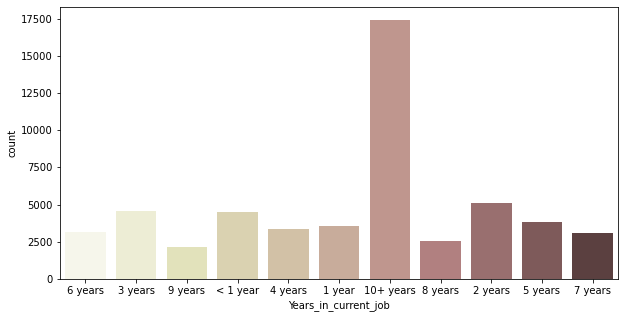

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(df_train['Years_in_current_job'], palette='pink_r');

In [42]:
# fill nulls in Years_in_current_job 

# for train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].fillna('10+ years')

# # for val
# df_val['Years_in_current_job'] = df_val['Years_in_current_job'].fillna('10+ years')

# for test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].fillna('10+ years')

In [43]:
# drop Months_since_last_delinquent bc the null > 50&

# train
df_train = df_train.drop(columns='Months_since_last_delinquent')

# test
df_test = df_test.drop(columns='Months_since_last_delinquent')

In [44]:
df_train.isnull().sum()

Loan_ID                        0
Customer_ID                    0
Loan_Status                    0
Current_Loan_Amount            0
Term                           0
Credit_Score                   0
Annual_Income                  0
Years_in_current_job           0
Home_Ownership                 0
Purpose                        0
Monthly_Debt                   0
Years_of_Credit_History        0
Number_of_Open_Accounts        0
Number_of_Credit_Problems      0
Current_Credit_Balance         0
Maximum_Open_Credit            1
Bankruptcies                 109
Tax_Liens                      3
dtype: int64

In [45]:
# drop nulls 

# for train
df_train = df_train.dropna()

# # for val
# df_val = df_val.dropna()

# for test
df_test = df_test.dropna()

In [46]:
df_train.isnull().sum()

Loan_ID                      0
Customer_ID                  0
Loan_Status                  0
Current_Loan_Amount          0
Term                         0
Credit_Score                 0
Annual_Income                0
Years_in_current_job         0
Home_Ownership               0
Purpose                      0
Monthly_Debt                 0
Years_of_Credit_History      0
Number_of_Open_Accounts      0
Number_of_Credit_Problems    0
Current_Credit_Balance       0
Maximum_Open_Credit          0
Bankruptcies                 0
Tax_Liens                    0
dtype: int64

In [47]:
df_train.duplicated().sum()

0

## Feature Engneering
---

In [48]:
df_train.isnull().sum()

Loan_ID                      0
Customer_ID                  0
Loan_Status                  0
Current_Loan_Amount          0
Term                         0
Credit_Score                 0
Annual_Income                0
Years_in_current_job         0
Home_Ownership               0
Purpose                      0
Monthly_Debt                 0
Years_of_Credit_History      0
Number_of_Open_Accounts      0
Number_of_Credit_Problems    0
Current_Credit_Balance       0
Maximum_Open_Credit          0
Bankruptcies                 0
Tax_Liens                    0
dtype: int64

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55608 entries, 0 to 80409
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_ID                    55608 non-null  object 
 1   Customer_ID                55608 non-null  object 
 2   Loan_Status                55608 non-null  object 
 3   Current_Loan_Amount        55608 non-null  float64
 4   Term                       55608 non-null  object 
 5   Credit_Score               55608 non-null  float64
 6   Annual_Income              55608 non-null  float64
 7   Years_in_current_job       55608 non-null  object 
 8   Home_Ownership             55608 non-null  object 
 9   Purpose                    55608 non-null  object 
 10  Monthly_Debt               55608 non-null  float64
 11  Years_of_Credit_History    55608 non-null  float64
 12  Number_of_Open_Accounts    55608 non-null  float64
 13  Number_of_Credit_Problems  55608 non-null  flo

### Get Dummies

In [50]:
# train
bank_lone_train = pd.get_dummies(df_train, columns =['Term','Home_Ownership','Purpose','Loan_Status', 'Years_in_current_job'], drop_first=True) ###

# # val
# bank_lone_val = pd.get_dummies(df_val, columns =['Term','Home_Ownership','Purpose','Loan_Status', 'Years_in_current_job'], drop_first=True) ###

# test
bank_lone_test = pd.get_dummies(df_test, columns =['Term','Home_Ownership','Purpose','Loan_Status' , 'Years_in_current_job'], drop_first=True) ###

In [51]:
bank_lone_train.columns

Index(['Loan_ID', 'Customer_ID', 'Current_Loan_Amount', 'Credit_Score',
       'Annual_Income', 'Monthly_Debt', 'Years_of_Credit_History',
       'Number_of_Open_Accounts', 'Number_of_Credit_Problems',
       'Current_Credit_Balance', 'Maximum_Open_Credit', 'Bankruptcies',
       'Tax_Liens', 'Term_Short Term', 'Home_Ownership_Home Mortgage',
       'Home_Ownership_Own Home', 'Home_Ownership_Rent', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip',
       'Purpose_major_purchase', 'Purpose_moving', 'Purpose_renewable_energy',
       'Purpose_small_business', 'Purpose_vacation', 'Purpose_wedding',
       'Loan_Status_Fully Paid', 'Years_in_current_job_10+ years',
       'Years_in_current_job_2 years', 'Years_in_current_job_3 years',
       'Years_in_current_job_4 years', 'Years_in_current_job_5 years',
       'Years_in_cu

In [52]:
df_train.corr()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
Current_Loan_Amount,1.000000,-0.105117,0.015514,-0.008151,0.026922,0.001346,-0.004906,0.006711,-0.000827,-0.001934,-0.002628
Credit_Score,-0.105117,1.000000,-0.014864,-0.000472,-0.013054,0.006577,0.000285,-0.003221,-0.003941,-0.003473,0.006607
Annual_Income,0.015514,-0.014864,1.000000,0.459476,0.148069,0.137162,-0.014591,0.304946,0.042415,-0.045649,0.040754
Monthly_Debt,-0.008151,-0.000472,0.459476,1.000000,0.194691,0.407775,-0.051059,0.484890,0.041829,-0.076626,0.021754
Years_of_Credit_History,0.026922,-0.013054,0.148069,0.194691,1.000000,0.131483,0.058908,0.210841,0.029104,0.061631,0.017174
Number_of_Open_Accounts,0.001346,0.006577,0.137162,0.407775,0.131483,1.000000,-0.014407,0.234957,0.033140,-0.025860,0.007073
Number_of_Credit_Problems,-0.004906,0.000285,-0.014591,-0.051059,0.058908,-0.014407,1.000000,-0.110801,-0.011297,0.749409,0.589154
Current_Credit_Balance,0.006711,-0.003221,0.304946,0.484890,0.210841,0.234957,-0.110801,1.000000,0.136300,-0.124809,-0.011894
Maximum_Open_Credit,-0.000827,-0.003941,0.042415,0.041829,0.029104,0.033140,-0.011297,0.136300,1.000000,-0.015012,-0.000835
Bankruptcies,-0.001934,-0.003473,-0.045649,-0.076626,0.061631,-0.025860,0.749409,-0.124809,-0.015012,1.000000,0.041065


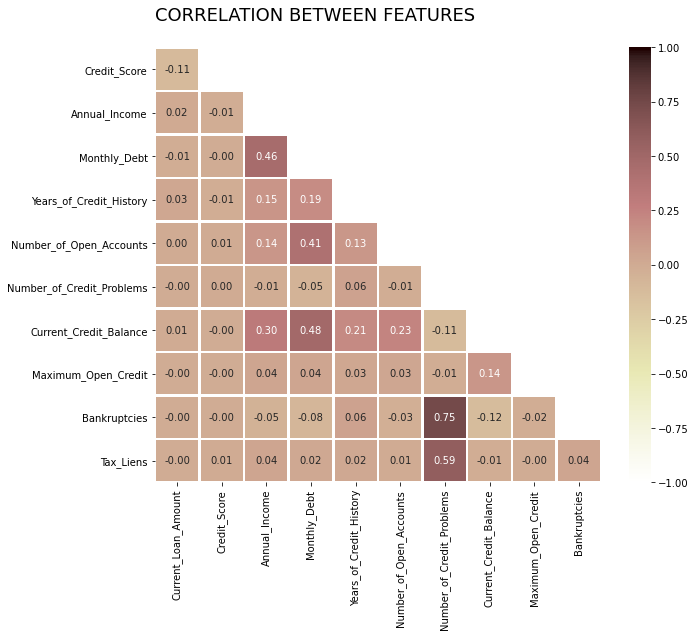

In [53]:
plt.figure(figsize=(10,8))

# corr
data_corr = df_train.corr()
# data_corr = bank_lone_train.corr()

# mask
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = data_corr.iloc[1:,:-1].copy()

sns.heatmap(corr, cmap = 'pink_r', annot = True, vmin= -1, vmax= 1, linewidths=1.5, fmt='.2f', mask=mask);
plt.title('CORRELATION BETWEEN FEATURES\n', loc='left', fontsize=18);
# plt.savefig('plot13.png', dpi = 300, bbox_inches = 'tight');

In [54]:
# sns.pairplot(bank_lone_train, hue = 'Term_Short Term', palette = 'pink_r');

## Visualize data
___

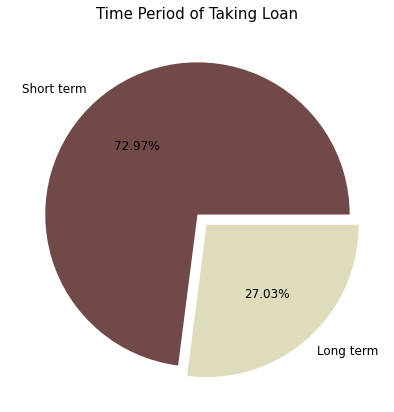

In [55]:
c = ['#724949','#cfa691', '#120f0f', '#a06868']
plt.figure(figsize=(7,7))
plt.pie(x = bank_lone_train['Term_Short Term'].value_counts(),
        labels=['Short term','Long term'],autopct='%.2f%%',
        textprops={'fontsize': 12},explode=[0,0.09], colors = ['#724949','#DEDCBB'])
plt.title('Time Period of Taking Loan',fontdict={'fontsize':15});

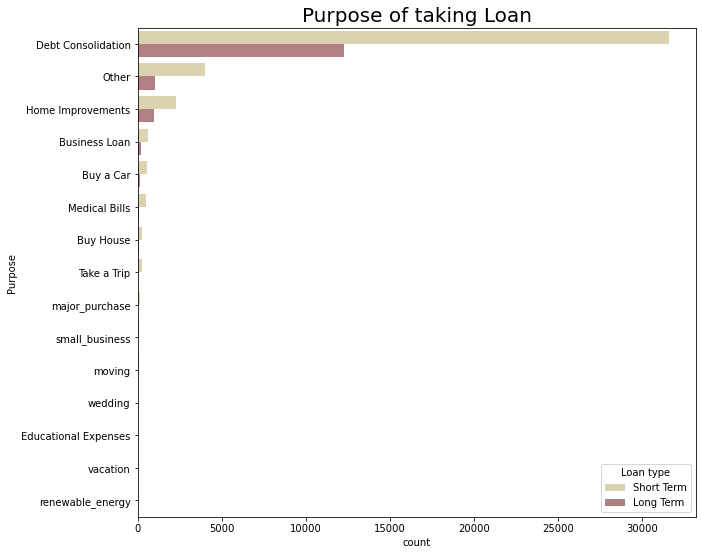

In [56]:
plt.figure(figsize=(10,9))
sns.countplot(y='Purpose' , data=df_train, order = df_train['Purpose'].value_counts().index,
              hue='Term', palette = 'pink_r')
plt.title('Purpose of taking Loan' , fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="lower right");

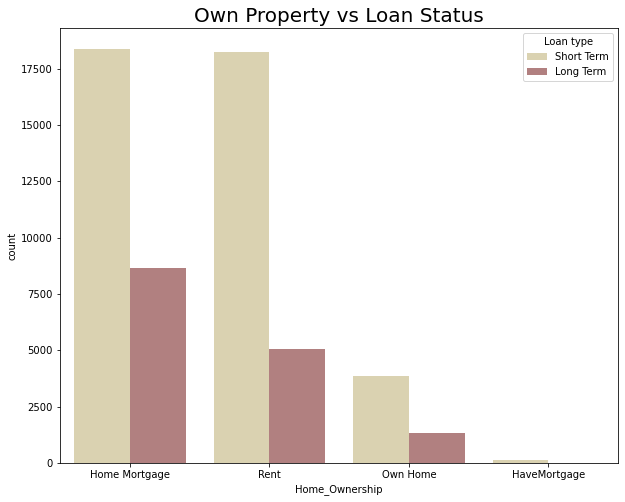

In [57]:
plt.figure(figsize=(10,8))
sns.countplot(x='Home_Ownership',data=df_train ,order = df_train['Home_Ownership'].value_counts().index
              ,hue='Term',  palette = 'pink_r')
plt.title('Own Property vs Loan Status',fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="upper right", labels=["Short Term","Long Term"]);

### Droping outliers

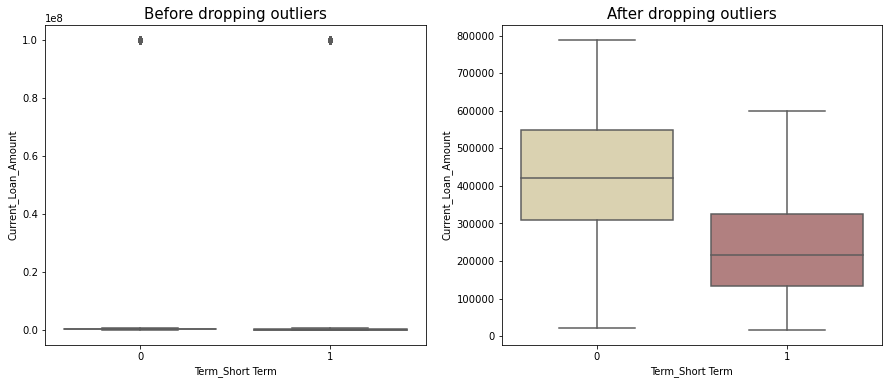

In [58]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Current_Loan_Amount',
            palette='pink_r', data=bank_lone_train.sort_values('Current_Loan_Amount',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 )

bank_lone_train = bank_lone_train[bank_lone_train['Current_Loan_Amount'] != 99999999]
bank_lone_train = bank_lone_train[((bank_lone_train['Current_Loan_Amount'] <= 600000 )
                                   & (bank_lone_train['Term_Short Term']==1))
                                  | (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Current_Loan_Amount',
            palette='pink_r', data=bank_lone_train.sort_values('Current_Loan_Amount',ascending=False));
plt.title('After dropping outliers',fontsize = 15 );

In [59]:
bank_lone_test = bank_lone_test[bank_lone_test['Current_Loan_Amount'] != 99999999]
bank_lone_test = bank_lone_test[((bank_lone_test['Current_Loan_Amount'] <= 600000 )
                                   & (bank_lone_test['Term_Short Term']==1))
                                  | (bank_lone_test['Term_Short Term']==0)]

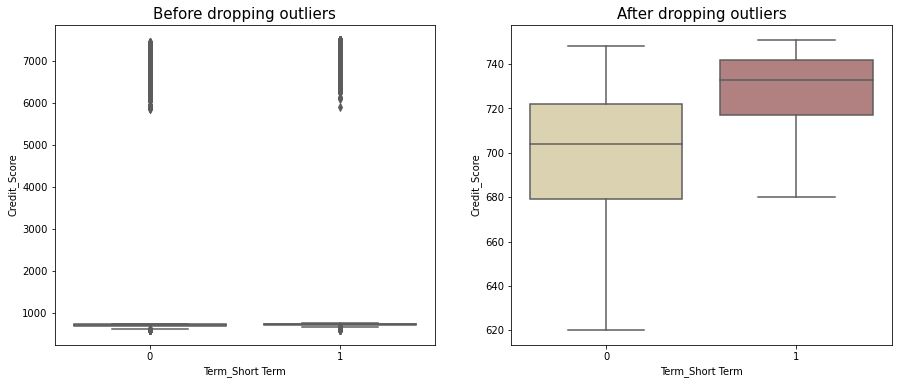

In [60]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Credit_Score',
            palette='pink_r', data = bank_lone_train.sort_values('Credit_Score',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 )

bank_lone_train = bank_lone_train.loc[bank_lone_train['Credit_Score'] <= 1500,:]
bank_lone_train = bank_lone_train.loc[bank_lone_train['Credit_Score'] >= 620 ,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Credit_Score'] >= 680 )
                                   & (bank_lone_train['Term_Short Term']==1))| 
                                  (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Credit_Score',
            palette='pink_r', data = bank_lone_train.sort_values('Credit_Score',ascending=False));
plt.title('After dropping outliers',fontsize = 15 );

In [61]:
bank_lone_test = bank_lone_test.loc[bank_lone_test['Credit_Score'] <= 1500,:]
bank_lone_test = bank_lone_test.loc[bank_lone_test['Credit_Score'] >= 620 ,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Credit_Score'] >= 680 )
                                   & (bank_lone_test['Term_Short Term']==1))| 
                                  (bank_lone_test['Term_Short Term']==0)]

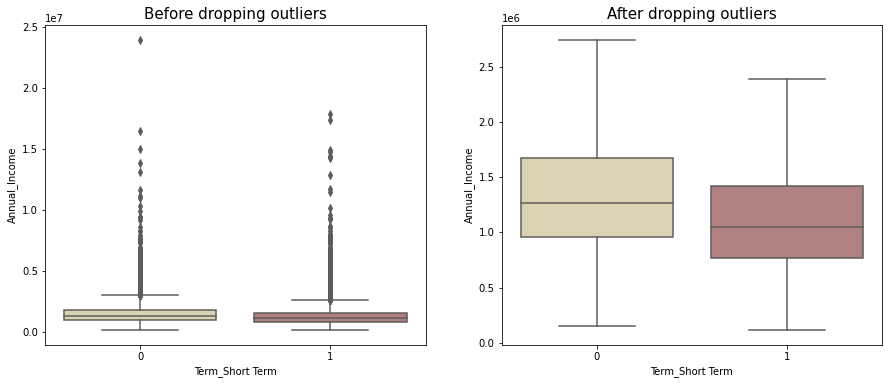

In [62]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Annual_Income',
            palette='pink_r', data = bank_lone_train.sort_values('Annual_Income',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 )

bank_lone_train = bank_lone_train.loc[bank_lone_train['Annual_Income'] <= 2750000,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Annual_Income'] <= 2395000 )
                                   & (bank_lone_train['Term_Short Term']==1))
                                  | (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Annual_Income',
            palette='pink_r', data = bank_lone_train.sort_values('Annual_Income',ascending=False));
plt.title('After dropping outliers',fontsize = 15 );

In [63]:
bank_lone_test = bank_lone_test.loc[bank_lone_test['Annual_Income'] <= 2750000,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Annual_Income'] <= 2395000 )
                                   & (bank_lone_test['Term_Short Term']==1))
                                  | (bank_lone_test['Term_Short Term']==0)]

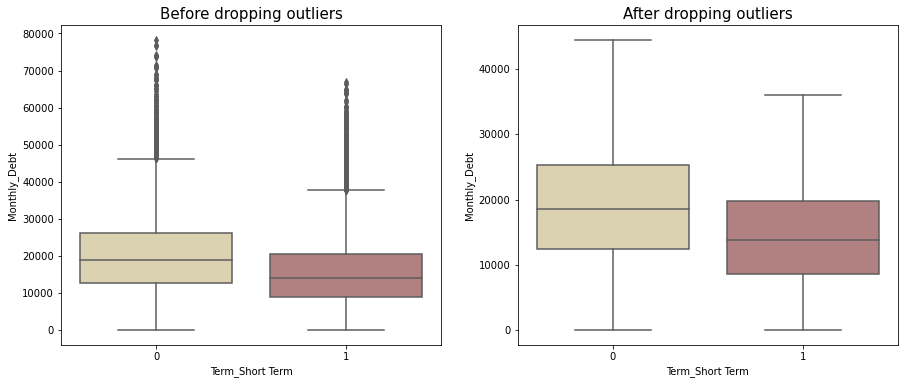

In [64]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Monthly_Debt',
            palette='pink_r', data=bank_lone_train.sort_values('Monthly_Debt',ascending=False));
plt.title('Before dropping outliers',fontsize = 15)

bank_lone_train = bank_lone_train.loc[bank_lone_train['Monthly_Debt'] <= 44500,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Monthly_Debt'] <= 36000 )& (bank_lone_train['Term_Short Term']==1))| 
                                  (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Monthly_Debt',
            palette='pink_r', data=bank_lone_train.sort_values('Monthly_Debt',ascending=False));
plt.title('After dropping outliers',fontsize = 15 );

In [65]:
bank_lone_test = bank_lone_test.loc[bank_lone_test['Monthly_Debt'] <= 44500,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Monthly_Debt'] <= 36000 )& 
                                   (bank_lone_test['Term_Short Term']==1))| 
                                  (bank_lone_test['Term_Short Term']==0)]

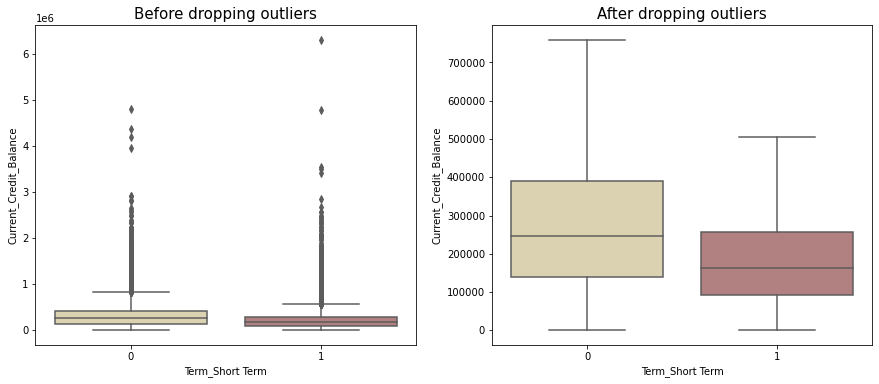

In [66]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Current_Credit_Balance',
            palette='pink_r', data=bank_lone_train.sort_values('Current_Credit_Balance',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 )

bank_lone_train = bank_lone_train.loc[bank_lone_train['Current_Credit_Balance'] <= 760000,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Current_Credit_Balance'] <= 504000 )& 
                                   (bank_lone_train['Term_Short Term']==1))| (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Current_Credit_Balance',
            palette='pink_r', data=bank_lone_train.sort_values('Current_Credit_Balance',ascending=False));
plt.title('After dropping outliers',fontsize = 15 );

In [67]:
bank_lone_test = bank_lone_test.loc[bank_lone_test['Current_Credit_Balance'] <= 760000,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Current_Credit_Balance'] <= 504000 )& 
                                   (bank_lone_test['Term_Short Term']==1))| 
                                  (bank_lone_test['Term_Short Term']==0)]

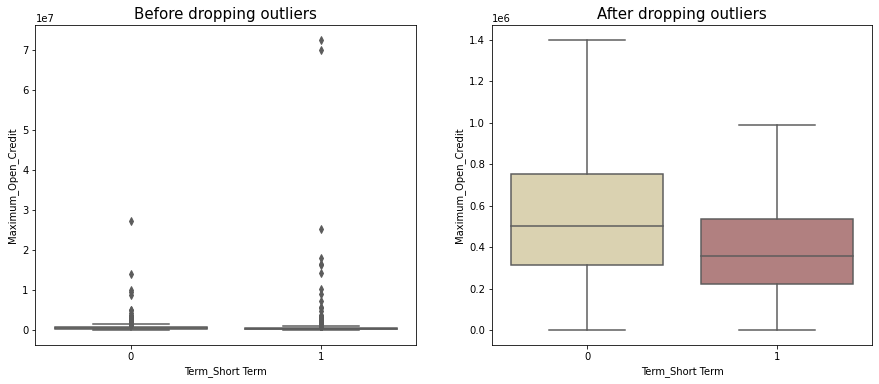

In [68]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Maximum_Open_Credit',
            palette='pink_r', data=bank_lone_train.sort_values('Maximum_Open_Credit',ascending=False));
plt.title('Before dropping outliers',fontsize = 15)

bank_lone_train = bank_lone_train.loc[bank_lone_train['Maximum_Open_Credit'] <= 1400000,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Maximum_Open_Credit'] <= 990000 )& 
                                   (bank_lone_train['Term_Short Term']==1))| (bank_lone_train['Term_Short Term']==0)]
plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Maximum_Open_Credit',
            palette='pink_r', data=bank_lone_train.sort_values('Maximum_Open_Credit',ascending=False));
plt.title('After dropping outliers',fontsize = 15 );

In [69]:
bank_lone_test = bank_lone_test.loc[bank_lone_test['Maximum_Open_Credit'] <= 1400000,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Maximum_Open_Credit'] <= 990000 )& 
                                   (bank_lone_test['Term_Short Term']==1))| 
                                  (bank_lone_test['Term_Short Term']==0)]

### plot the correlation after one hot coding

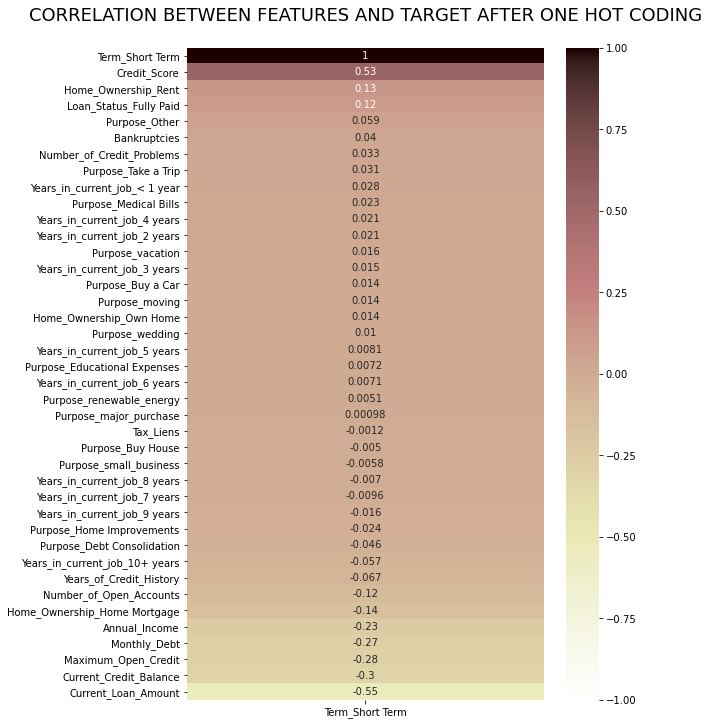

In [70]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(bank_lone_train.corr()[
    ['Term_Short Term']].sort_values(by='Term_Short Term',ascending=False),
                      vmin=-1, vmax=1, annot=True,
                      cmap = 'pink_r')
plt.title('CORRELATION BETWEEN FEATURES AND TARGET AFTER ONE HOT CODING\n', loc='center', fontsize=18);

In [71]:
X_train = bank_lone_train.drop(['Term_Short Term','Loan_ID','Customer_ID',
                                'Credit_Score', 'Years_of_Credit_History', 
                                'Number_of_Credit_Problems', 'Number_of_Open_Accounts',
                                'Bankruptcies'], axis = 1)
y_train = bank_lone_train['Term_Short Term']
X_test = bank_lone_test.drop(['Term_Short Term','Loan_ID','Customer_ID',
                                'Credit_Score', 'Years_of_Credit_History', 
                                'Number_of_Credit_Problems', 'Number_of_Open_Accounts',
                                'Bankruptcies'], axis = 1)
y_test = bank_lone_test['Term_Short Term']

In [72]:
model = sm.OLS(y_train,X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Term_Short Term   R-squared (uncentered):                 -48.324
Model:                            OLS   Adj. R-squared (uncentered):            -48.376
Method:                 Least Squares   F-statistic:                             -941.7
Date:                Thu, 16 Dec 2021   Prob (F-statistic):                        1.00
Time:                        09:14:34   Log-Likelihood:                         -14633.
No. Observations:               32713   AIC:                                  2.933e+04
Df Residuals:                   32679   BIC:                                  2.962e+04
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Current_Loan_Amount            -1.545e-06   1.69e-08    -91.578      0.000   -1.58e-06   -1.51e-06
Annual_Income                   5.935e-08   5.65e-09     10.500      0.000    4.83e-08    7.04e-08
Monthly_Debt                   -2.882e-06   3.19e-07     -9.036      0.000   -3.51e-06   -2.26e-06
Current_Credit_Balance         -5.766e-08   2.36e-08     -2.448      0.014   -1.04e-07   -1.15e-08
Maximum_Open_Credit            -7.519e-08   1.19e-08     -6.311      0.000   -9.85e-08   -5.18e-08
Tax_Liens                          0.0096      0.008      1.174      0.241      -0.006       0.026
Home_Ownership_Home Mortgage       0.9325      0.020     45.955      0.000       0.893       0.972
Home_Ownership_Own Home            0.9586      0.021     45.944      0.000       0.918       0.999
Home_Ownership_Rent                0.9762      0.020     49.223      0.000       0.937       1.015
Purpose_Buy House                  0.0469      0.032      1.455      0.146      -0.016       0.110
Purpose_Buy a Car                 -0.0315      0.025     -1.237      0.216      -0.081       0.018
Purpose_Debt Consolidation         0.1189      0.018      6.683      0.000       0.084       0.154
Purpose_Educational Expenses      -0.0339      0.070     -0.483      0.629      -0.172       0.104
Purpose_Home Improvements          0.0575      0.020      2.896      0.004       0.019       0.096
Purpose_Medical Bills              0.0450      0.027      1.651      0.099      -0.008       0.098
Purpose_Other                      0.0415      0.019      2.193      0.028       0.004       0.079
Purpose_Take a Trip                0.3823      0.031     12.244      0.000       0.321       0.444
Purpose_major_purchase            -0.0168      0.039     -0.427      0.670      -0.094       0.060
Purpose_moving                     0.0414      0.066      0.631      0.528      -0.087       0.170
Purpose_renewable_energy           0.0514      0.268      0.191      0.848      -0.475       0.577
Purpose_small_business             0.0546      0.047      1.166      0.244      -0.037       0.147
Purpose_vacation                   0.0729      0.078      0.937      0.349      -0.080       0.225
Purpose_wedding                    0.1790      0.065      2.767      0.006       0.052       0.306
Loan_Status_Fully Paid             0.0886      0.005     17.738      0.000       0.079       0.098
Years_in_current_job_10+ years     0.0197      0.009      2.194      0.028       0.002       0.037
Years_in_current_job_2 years       0.0262      0.011      2.473      0.013       0.005       0.047
Years_in_current_job_3 years       0.0244      0.011      2.258      0.024       0.003       0.046
Years_in_curre

---

In [73]:
y_train.value_counts()

1    22879
0     9834
Name: Term_Short Term, dtype: int64

In [74]:
# Separate class
long_term_0 = bank_lone_train[bank_lone_train['Term_Short Term'] == 0]
short_term_1 = bank_lone_train[bank_lone_train['Term_Short Term'] == 1]# print the shape of the class
print('Long term 0:', long_term_0.shape[0])
print('Short term 1:', short_term_1.shape[0])

Long term 0: 9834
Short term 1: 22879


## Logistic Regression
---

In [75]:
# gridsearch
params = {'C': [0.001,0.01,0.1,1,10,100,1000], 'class_weight':[{0:0,0:0.01,0:0.1,0:0.5,0:1,0:10,0:2} ] }
lr_grid = GridSearchCV(LogisticRegression(), param_grid = params, scoring='f1', cv = 5)
lr_grid.fit(X_train, y_train)
print('\n Best param after grid search: ', lr_grid.best_params_ )
print(' Best f1_score for cross validation: ',lr_grid.best_score_ )

# normal
LR = LogisticRegression(C= 0.001 ,solver='liblinear')
kf = KFold(n_splits=10, random_state=42, shuffle=True)
cr_f1 = cross_val_score(LR, X_train, y_train, scoring='f1', cv=kf)
print('\n Normal Logistic Regression Valdition F1: \n',cr_f1)
print('\n Mean Normal Logistic Regression Valdition F1: \n',cr_f1.mean())
print('--------------------------------')

# balenced
lr_balanced = LogisticRegression(class_weight='balanced', solver='liblinear')
cr_balnced_f1 = cross_val_score(lr_balanced, X_train, y_train, scoring='f1', cv=kf)
print('\n Balanced class weights Logistic Regression Valdition F1: \n',cr_balnced_f1)
print('\n Mean Balanced class weights Logistic Regression Valdition F1: \n',cr_balnced_f1.mean())
print('--------------------------------')

# weighted
lr_4x = LogisticRegression(C= 0.001, class_weight={0 : 2, 1 : 1}, solver='liblinear')
cr_weghts_f1 = cross_val_score(lr_4x, X_train, y_train, scoring='f1', cv=kf)
print('\n Class weights Logistic Regression Valdition F1: \n',cr_weghts_f1)
print('\n Mean Class weights Logistic Regression Valdition F1: \n',cr_weghts_f1.mean())
print('--------------------------------')

# smote
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              LogisticRegression(C= 0.001, solver='liblinear'))

imba_val = cross_val_score(imba_pipeline, X_train, y_train, scoring='f1', cv=kf)
print('\n Smote Logistic Regression Valdition F1: \n', imba_val)
print('\n Mean Smote Logistic Regression Valdition F1: \n', imba_val.mean())


 Best param after grid search:  {'C': 0.001, 'class_weight': {0: 2}}
 Best f1_score for cross validation:  0.7170806194365902

 Normal Logistic Regression Valdition F1: 
 [0.80033913 0.8061049  0.80355209 0.81094844 0.80573385 0.81843397
 0.81005587 0.80310211 0.79921943 0.80628498]

 Mean Normal Logistic Regression Valdition F1: 
 0.8063774752538592
--------------------------------

 Balanced class weights Logistic Regression Valdition F1: 
 [0.69856704 0.68117866 0.67982693 0.69860896 0.67910644 0.6945388
 0.701063   0.67845829 0.68236553 0.68821192]

 Mean Balanced class weights Logistic Regression Valdition F1: 
 0.6881925584835079
--------------------------------

 Class weights Logistic Regression Valdition F1: 
 [0.72161895 0.71736375 0.71184687 0.72370057 0.70962851 0.72622334
 0.72863568 0.70393058 0.71534717 0.71443193]

 Mean Class weights Logistic Regression Valdition F1: 
 0.71727273536161
--------------------------------

 Smote Logistic Regression Valdition F1: 
 [0.699

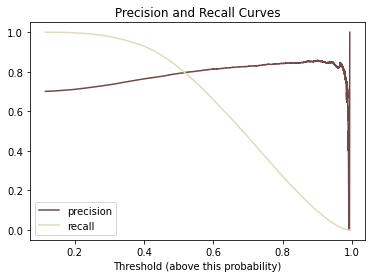

In [76]:
LR.fit(X_train, y_train)
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, LR.predict_proba(X_train)[:,1] )
plt.plot(threshold_curve, precision_curve[1:],label='precision', color = '#724949')
plt.plot(threshold_curve, recall_curve[1:], label='recall', color = '#DEDCBB')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability)');
plt.title('Precision and Recall Curves');

In [77]:
y_predict = (LR.predict_proba(X_train)[:, 1] >= 0.65)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

Default threshold:
Precision: 0.8209,   Recall: 0.5669


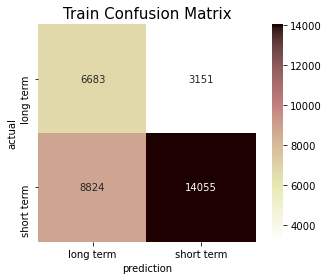

In [78]:
y_predict = (LR.predict_proba(X_train)[:, 1] >= 0.624)

loan_confusion = confusion_matrix(y_train, y_predict)

sns.heatmap(loan_confusion , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Train Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

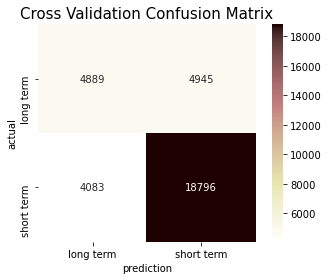

In [79]:
# confusion matrix for crossval
y_pred = cross_val_predict(LR, X = X_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

## KNN Model
---

In [80]:
knn = KNeighborsClassifier(n_neighbors= 9)
k_range = list(range(3,11))
param_grd = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grd, scoring='f1', cv = 5)
grid.fit(X_train, y_train)
print('Best estimator: ', grid.best_estimator_ )
print('Best f1_score for cross validation: ',grid.best_score_ )

Best estimator:  KNeighborsClassifier(n_neighbors=9)
Best f1_score for cross validation:  0.8520606952259486


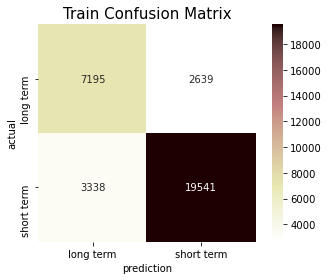

In [81]:
y_predict = (grid.predict_proba(X_train)[:, 1] >= 0.624)

loan_confusion = confusion_matrix(y_train, y_predict)

sns.heatmap(loan_confusion , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Train Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

## Decision Tree Classifier
---

In [82]:
# normal
Decision_Tree = DecisionTreeClassifier(max_depth = 8)
Decision_Tree.fit(X_train, y_train)
scores = cross_val_score(Decision_Tree, X_train, y_train, cv=5, scoring='f1')
print('Normal Decision Tree Valdition F1:',scores.mean())


# balenced
dt_bal = DecisionTreeClassifier(max_depth = 8, class_weight='balanced')
dt_bal.fit(X_train, y_train)
scores = cross_val_score(dt_bal, X_train, y_train, cv=5, scoring='f1')
print('Balanced class weights Decision Tree Valdition F1:',scores.mean())


# weighted
dt_wtd = DecisionTreeClassifier(class_weight= {0 : 10, 1 : 1})
scores = cross_val_score(dt_wtd, X_train, y_train, cv=5, scoring='f1')
dt_wtd.fit(X_train, y_train)
print('10:1 class weights Decision Tree Valdition F1:',scores.mean())

#gridsearch

tree_param = {'criterion':['gini','entropy'],
              'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

gd_sr = GridSearchCV(DecisionTreeClassifier(), param_grid=tree_param,scoring='f1',cv=5,n_jobs=-1)
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
print('\n Best param after grid search', best_parameters)
print('\n Best score after grid search', gd_sr.best_score_)

Normal Decision Tree Valdition F1: 0.8682343570277998
Balanced class weights Decision Tree Valdition F1: 0.8067320700735481
10:1 class weights Decision Tree Valdition F1: 0.8196632601666813

 Best param after grid search {'criterion': 'entropy', 'max_depth': 8}

 Best score after grid search 0.8703644068949103


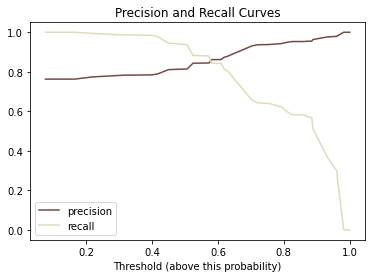

In [84]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, Decision_Tree.predict_proba(X_train)[:,1] )
plt.plot(threshold_curve, precision_curve[1:],label='precision', color = '#724949')
plt.plot(threshold_curve, recall_curve[1:], label='recall', color = '#DEDCBB')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability)');
plt.title('Precision and Recall Curves');

In [85]:
y_predict = (Decision_Tree.predict_proba(X_train)[:, 1] >= 0.5569)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

Default threshold:
Precision: 0.8434,   Recall: 0.8825


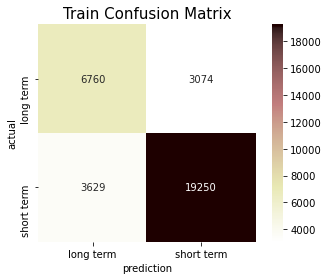

In [88]:
y_predict = (Decision_Tree.predict_proba(X_train)[:, 1] >= 0.61)

loan_confusion = confusion_matrix(y_train, y_predict)

sns.heatmap(loan_confusion , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Train Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

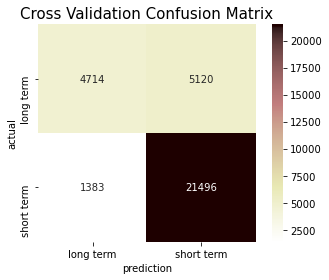

In [89]:
# confusion matrix for crossval
y_pred = cross_val_predict(Decision_Tree, X = X_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

## Random Forest Classifier
---

In [91]:
# normal
Random_Forest = RandomForestClassifier(n_estimators = 5, random_state=1)
Random_Forest.fit(X_train, y_train)
scores = cross_val_score(Random_Forest, X_train, y_train, cv=10, scoring='f1')
print('\n Normal Random Forest Valdition F1: \n',scores)
print('\n Mean Normal Random Forest Valdition F1:  \n',scores.mean())

# balenced
rf_bal = RandomForestClassifier(n_estimators = 10, random_state=1, class_weight='balanced')
rf_bal.fit(X_train, y_train)
scores = cross_val_score(rf_bal, X_train, y_train, cv=10, scoring='f1')
print('\n Balanced class weights Random Forest Valdition F1: \n',scores)
print('\n Mean Balanced class weights Random Forest Valdition F1: \n',scores.mean())

# weighted
rf_wtd = RandomForestClassifier(n_estimators = 10, random_state=1, class_weight= {0 : 2, 1 : 1})
rf_wtd.fit(X_train, y_train)
scores = cross_val_score(rf_wtd, X_train, y_train, cv=10, scoring='f1')
print('\n 2:1 class weights Random Forest Valdition F1:\n',scores)
print('\n 2:1 class weights Random Forest Valdition F1: \n',scores.mean())

#gridsearch
grid_param = {
    'n_estimators': [100, 300, 200, 50, 500],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]}
gd_sr1 = GridSearchCV(estimator=Random_Forest, param_grid=grid_param,scoring='f1',cv=5,n_jobs=-1)
gd_sr1.fit(X_train, y_train)
best_parameters = gd_sr1.best_params_
print('\n Best param after grid search', best_parameters)
print('\n Best score after grid search', gd_sr1.best_score_)


 Normal Random Forest Valdition F1: 
 [0.84138521 0.84808789 0.85108188 0.85075885 0.84680851 0.84810938
 0.84208271 0.83989726 0.83890317 0.8522293 ]

 Mean Normal Random Forest Valdition F1:  
 0.8459344165420063

 Balanced class weights Random Forest Valdition F1: 
 [0.84176394 0.84282655 0.84984985 0.8447099  0.84553899 0.84817204
 0.84937419 0.83855527 0.83732988 0.85788114]

 Mean Balanced class weights Random Forest Valdition F1: 
 0.845600174919469

 2:1 class weights Random Forest Valdition F1:
 [0.84906481 0.83946918 0.85396622 0.84484228 0.84021858 0.84233261
 0.85202761 0.84756757 0.83643444 0.86157158]

 2:1 class weights Random Forest Valdition F1: 
 0.8467494887782726

 Best param after grid search {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 500}

 Best score after grid search 0.8649910172982078


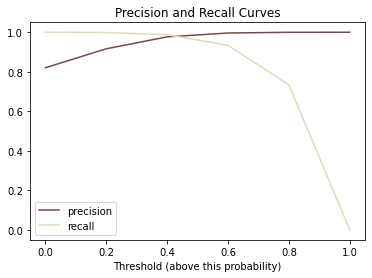

In [92]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, Random_Forest.predict_proba(X_train)[:,1] )
plt.plot(threshold_curve, precision_curve[1:],label='precision', color = '#724949')
plt.plot(threshold_curve, recall_curve[1:], label='recall', color = '#DEDCBB')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability)');
plt.title('Precision and Recall Curves');

In [93]:
y_predict = (Random_Forest.predict_proba(X_train)[:, 1] >= 0.66)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

Default threshold:
Precision: 0.9961,   Recall: 0.9338


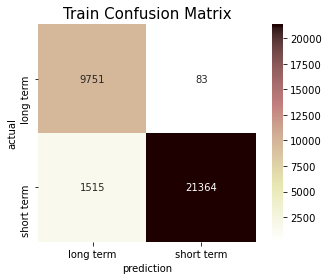

In [95]:
y_predict = (Random_Forest.predict_proba(X_train)[:, 1] >= 0.61)

loan_confusion = confusion_matrix(y_train, y_predict)

sns.heatmap(loan_confusion , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Train Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

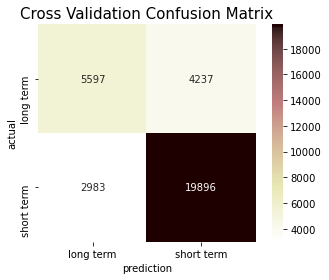

In [96]:
# confusion matrix for crossval
y_pred = cross_val_predict(Random_Forest, X = X_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

## Extra Tree
---

In [97]:
Extra_Tree = ExtraTreesClassifier()
Extra_Tree.fit(X_train, y_train)
scores = cross_val_score(Extra_Tree, X_train, y_train, cv =5, scoring = 'f1')
print('f1_scores for validation: ',scores)
print('Mean f1_score for validation: ',scores.mean())

f1_scores for validation:  [0.85987851 0.86062219 0.85894389 0.85481206 0.86071761]
Mean f1_score for validation:  0.8589948514434982


In [98]:
y_predict = (Extra_Tree.predict_proba(X_train)[:, 1] >= 0.1)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

Default threshold:
Precision: 1.0000,   Recall: 1.0000


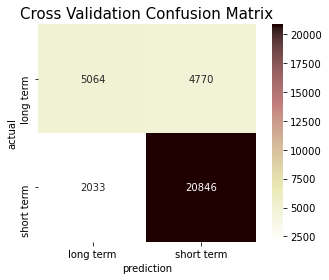

In [99]:
# confusion matrix for crossval
y_pred = cross_val_predict(Extra_Tree, X = X_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

## Stacking
---

In [100]:
lr = LogisticRegression() 
stacked = StackingClassifier(classifiers =[knn,Decision_Tree, lr], meta_classifier = lr, use_probas = False)
model_stack = stacked.fit(X_train, y_train)   # training of stacked model
accuracies = cross_val_score(estimator = model_stack, X = X_train, y = y_train, cv = 5, scoring='f1')
print('f1_score stacking for cross validation : ',accuracies)
print('Mean f1_score stacking for cross validation : ',accuracies.mean())

f1_score stacking for cross validation :  [0.85486212 0.85765538 0.853687   0.84993106 0.84945123]
Mean f1_score stacking for cross validation :  0.8531173587436328


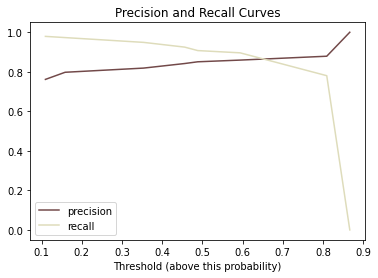

In [152]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, stacked.predict_proba(X_train)[:,1] )
plt.plot(threshold_curve, precision_curve[1:],label='precision', color = '#724949')
plt.plot(threshold_curve, recall_curve[1:], label='recall', color = '#DEDCBB')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability)');
plt.title('Precision and Recall Curves');

In [101]:
y_predict = (stacked.predict_proba(X_train)[:, 1] >= 0.1)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

Default threshold:
Precision: 0.6994,   Recall: 1.0000


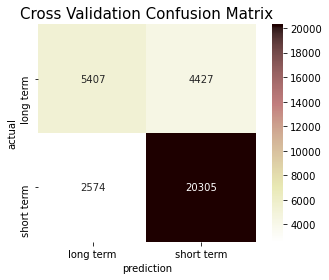

In [102]:
# confusion matrix for crossval
y_pred = cross_val_predict(stacked, X = X_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

## Bagging
---

In [106]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=50,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

accuracies = cross_val_score(estimator = bag_clf, X = X_train, y = y_train, cv = 5, scoring='f1')
print('f1_score Bagging for cross validation : ',accuracies)
print('Mean f1_score Bagging for cross validation : ',accuracies.mean())

f1_score Bagging for cross validation :  [0.85157074 0.85654362 0.84984026 0.85540757 0.85140217]
Mean f1_score Bagging for cross validation :  0.8529528702492852


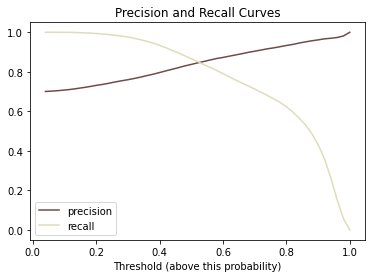

In [153]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, bag_clf.predict_proba(X_train)[:,1] )
plt.plot(threshold_curve, precision_curve[1:],label='precision', color = '#724949')
plt.plot(threshold_curve, recall_curve[1:], label='recall', color = '#DEDCBB')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability)');
plt.title('Precision and Recall Curves');

In [107]:
y_predict = (bag_clf.predict_proba(X_train)[:, 1] >= 0.1)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

Default threshold:
Precision: 0.7045,   Recall: 0.9998


In [111]:
# confusion matrix for crossval
y_pred = cross_val_predict(bag_clf, X = X_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
conf_mat

array([[ 5592,  4242],
       [ 2618, 20261]])

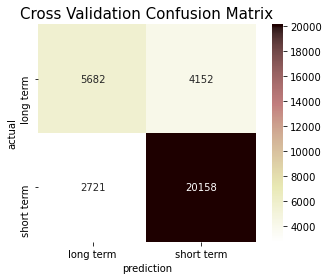

In [112]:
# confusion matrix for crossval
y_pred = cross_val_predict(bag_clf, X = X_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

## Boosting
---

* ### AdaBoost

In [110]:
param_grid = {'base_estimator__criterion' : ['gini', 'entropy'],
              'base_estimator__splitter' :   ['best', 'random'],
              'n_estimators': [1, 5, 10, 20, 100, 500]
             }
DTC = DecisionTreeClassifier(random_state = 0)
ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'f1')
grid_search_ABC.fit(X_train, y_train)

print('\n Best param after grid search', grid_search_ABC.best_params_)
print('\n Best score after grid search', grid_search_ABC.best_score_)


 Best param after grid search {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 1}

 Best score after grid search 0.8198444504326892


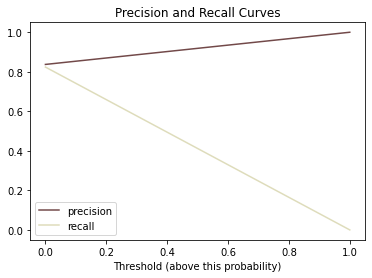

In [154]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, grid_search_ABC.predict_proba(X_train)[:,1] )
plt.plot(threshold_curve, precision_curve[1:],label='precision', color = '#724949')
plt.plot(threshold_curve, recall_curve[1:], label='recall', color = '#DEDCBB')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability)');
plt.title('Precision and Recall Curves');

In [113]:
y_predict = (grid_search_ABC.predict_proba(X_train)[:, 1] >= 0.1)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

Default threshold:
Precision: 1.0000,   Recall: 1.0000


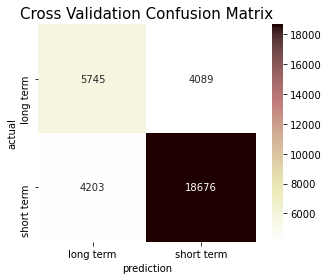

In [114]:
# confusion matrix for crossval
y_pred = cross_val_predict(grid_search_ABC, X = X_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

* ### Gradient Boosting

In [119]:
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.05)
gbc.fit(X_train, y_train)
accuracies = cross_val_score(estimator = gbc, X = X_train, y = y_train, cv = 5, scoring='f1')
print('f1_score Gradient Boosting for cross validation : ',accuracies)
print('Mean f1_score Gradient Boosting for cross validation : ',accuracies.mean())

f1_score Gradient Boosting for cross validation :  [0.87095787 0.87022591 0.86919052 0.86980609 0.87716422]
Mean f1_score Gradient Boosting for cross validation :  0.8714689247308011


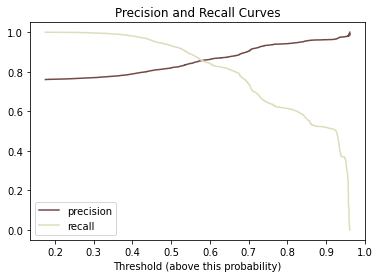

In [155]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, gbc.predict_proba(X_train)[:,1] )
plt.plot(threshold_curve, precision_curve[1:],label='precision', color = '#724949')
plt.plot(threshold_curve, recall_curve[1:], label='recall', color = '#DEDCBB')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability)');
plt.title('Precision and Recall Curves');

In [120]:
y_predict = (gbc.predict_proba(X_train)[:, 1] >= 0.1)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

Default threshold:
Precision: 0.7505,   Recall: 1.0000


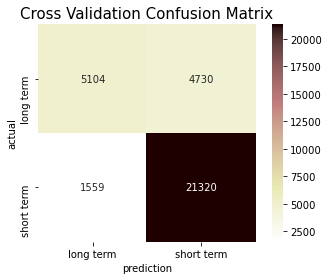

In [121]:
# confusion matrix for crossval
y_pred = cross_val_predict(gbc, X = X_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

In [ ]:
# # A sample parameter
# parameters = {
#     'loss':['deviance'],
#     'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
#     'min_samples_split': np.linspace(0.1, 0.5, 12),
#     'min_samples_leaf': np.linspace(0.1, 0.5, 12),
#     'max_depth':[1,3,5],
#     'max_features':['log2','sqrt'],
#     'criterion': ['friedman_mse',  'mae'],
#     'subsample':[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
#     'n_estimators':[5]
#     }


# #passing the scoring function in the GridSearchCV
# clf = GridSearchCV(GradientBoostingClassifier(), parameters, scoring='f1',refit=False,cv=5, n_jobs=-1)
# clf.fit(X_train, y_train)

# print('\n Best param after grid search', clf.best_params_)
# print('\n Best score after grid search', clf.best_score_)

* ### XGBoost

In [118]:
X_train.columns = X_train.columns.str.replace('<','less').str.replace(' ','_')

xgboost = XGBClassifier(n_estimators = 100, learning_rate = 0.05)
xgboost.fit(X_train, y_train)
accuracies = cross_val_score(estimator = xgboost, X = X_train, y = y_train, cv = 5, scoring='f1')
print('f1_score XGBoost for cross validation : ',accuracies)
print('Mean f1_score XGBoost for cross validation : ',accuracies.mean())

f1_score XGBoost for cross validation :  [0.87436471 0.87179487 0.87069406 0.87197797 0.87692465]
Mean f1_score XGBoost for cross validation :  0.873151250557083


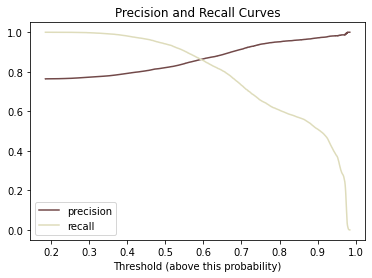

In [150]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, xgboost.predict_proba(X_train)[:,1] )
plt.plot(threshold_curve, precision_curve[1:],label='precision', color = '#724949')
plt.plot(threshold_curve, recall_curve[1:], label='recall', color = '#DEDCBB')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability)');
plt.title('Precision and Recall Curves');

In [122]:
y_predict = (xgboost.predict_proba(X_train)[:, 1] >= 0.1)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

Default threshold:
Precision: 0.7634,   Recall: 1.0000


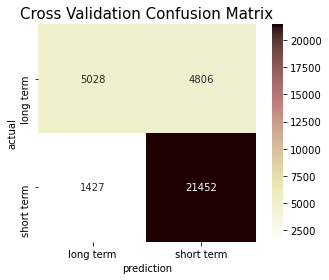

In [123]:
# confusion matrix for crossval
y_pred = cross_val_predict(xgboost, X = X_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

In [ ]:
# X_train.columns = X_train.columns.str.replace('<','less').str.replace(' ','_')

# estimator = XGBClassifier(
#     objective= 'binary:logistic',
#     nthread=4,
#     seed=42)

# parameters = {
#     'max_depth': range (2, 10, 1),
#     'n_estimators': range(60, 220, 40),
#     'learning_rate': [0.1, 0.01, 0.05]}

# grid_search = GridSearchCV(estimator=estimator,param_grid=parameters,scoring = 'f1',n_jobs = 10,cv = 10,
#                            verbose=True)
# grid_search.fit(X_train, y_train)

# print('score',grid_search.best_estimator_)

## Voting Classifer (HARD)
---

In [125]:
log=LogisticRegression() 
rnd=RandomForestClassifier()
dct=DecisionTreeClassifier()
voting_classifer = VotingClassifier(estimators=[('lr',log),('rf',rnd),('dt',dct)],voting='hard',n_jobs=-1)
voting_classifer.fit(X_train, y_train)
scores = cross_val_score(voting_classifer, X_train, y_train, cv=5, scoring='f1')
print('f1_score Voting Classifer for cross validation : ',scores)
print('Mean f1_score Voting Classifer for cross validation : ',scores.mean())

f1_score Voting Classifer for cross validation :  [0.86041142 0.85852225 0.8549003  0.85386819 0.86433007]
Mean f1_score Voting Classifer for cross validation :  0.8584064463069108


In [ ]:
# models = [('rf', gd_sr1 ), ('ad', grid_search_ABC )]
# vc_wtd = VotingClassifier(estimators= models, voting='hard', n_jobs=-1)
# vc_wtd.fit(X_train, y_train)
# scores = cross_val_score(vc_wtd, X_train, y_train, cv=10, scoring='f1')
# print('lass weights Random Forest Valdition F1:',scores.mean())

___
# Test
___

In [148]:
# X_train.columns = X_train.columns.str.replace('<','less').str.replace(' ','_')
# xgboost = XGBClassifier(n_estimators = 100, learning_rate = 0.05)
# xgboost.fit(X_train, y_train)
# accuracies = cross_val_score(estimator = xgboost, X = X_train, y = y_train, cv = 5, scoring='f1')
# print('f1_score XGBoost for cross validation : ',accuracies)
# print('Mean f1_score XGBoost for cross validation : ',accuracies.mean())

f1_score XGBoost for cross validation :  [0.87436471 0.87179487 0.87069406 0.87197797 0.87692465]
Mean f1_score XGBoost for cross validation :  0.873151250557083


In [149]:
y_pred_ =xgboost.predict(X_test)
y_pred_1 =xgboost.predict(X_train)
scores_1 = metrics.f1_score(y_train, y_pred_1)
scores = metrics.f1_score(y_test, y_pred_)
print('Test score for XGBoost: ', scores)

Test score for XGBoost:  0.8691032724181896


# Conclusion
In Conclusion, after examen multiple classification models, it is clear that the best model to predict whether a loan is a short term or a long term is XGBoost classification model, which gave the highest cross validation F1. The last step for this project is to train the best model using cross validation sets (80% of the data), and test it using the splatted data for testing (20% of the data set). Then F1 score for both the training and testing will be printed. F1 for the cross validition set is 0.8731 and for the testing set 0.8691 as shown above. However, For future work, more classification models will be examined.